# Example: Using The `mech447` Package Within a Jupyter Notebook (`.ipynb`)

The purpose of this notebook is to demonstrate how the `mech447` package can be used as part of a notebook.

## Dependencies

Of course, this notebook depends on having access to the `mech447` package. Since this package is not `pip` installable (as of the writing of this notebook), it must be manually installed instead. Fortunately, this is quite straightforward.

  * First, create a folder in this notebook's session files called `mech447`.

  * Next, download the `mech447` package from the GitHub repo (<https://github.com/gears1763-2/mech447>). You should be able to just `<> Code --> Download ZIP`.

  * Unzip the download, find the contained `mech447` folder, and open it.

  * Upload the contents of the downloaded `mech447` folder into the folder of the same name which you created in this notebook's session files.

Once all that is done, you *should* be able to import `mech447` as follows (tested on Google Collab):

In [1]:
# 1. import other stuff
import numpy as np

# 2. import mech447 modules (select examples)
import mech447.projecteconomics as pe
import mech447.stockflow as sf
import mech447.unitpriceforecaster as upf

print("mech447 imports were successful!")

mech447 imports were successful!


To show an example of using the package within a notebook, the stocks and flows example that ships with the package (`stocks_and_flows_example.py`) is re-created in part here.

--------

## Define Modelling Inputs

In [2]:
#   1. define modelling inputs

#   1.1. model over a 100-year horizon, in steps of 1/1000 of a year
n_years = 100
modelling_density = 1000
time_array_years = np.linspace(0, n_years, modelling_density * n_years)

#   1.2. define constants
alpha_per_year = 0.03
mu_per_year = -0.02

P_0_Mt_per_year = 5
F_0_Mt_per_year = 100
total_resource_Mt = 1000

reserve_initial_Mt = 0
maximum_reserve_Mt = np.inf

#   1.3. construct input arrays
unconstrained_addition_array_Mt_per_year = (
    F_0_Mt_per_year * np.exp(mu_per_year * time_array_years)
)

unconstrained_source_array_Mt_per_year = np.zeros(len(time_array_years))

unconstrained_production_array_Mt_per_year = (
    P_0_Mt_per_year * np.exp(alpha_per_year * time_array_years)
)

--------

## Run Model, Plot Results

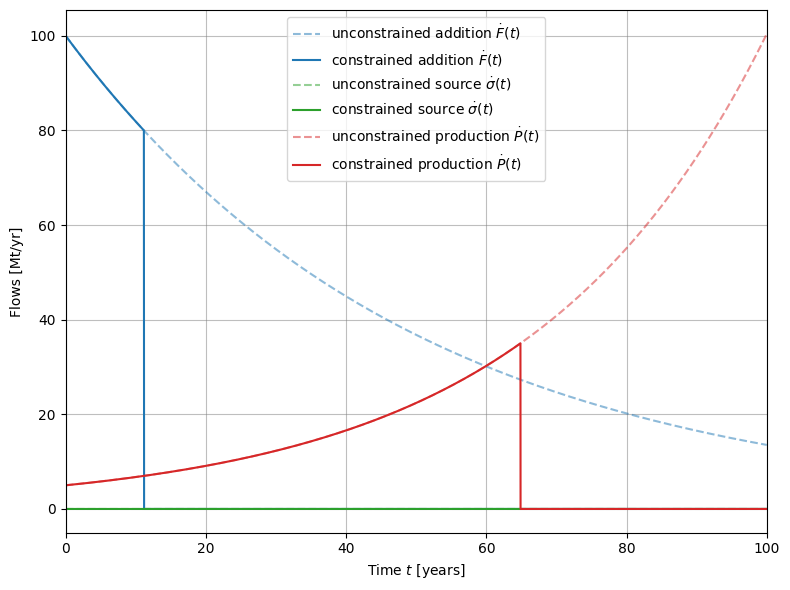

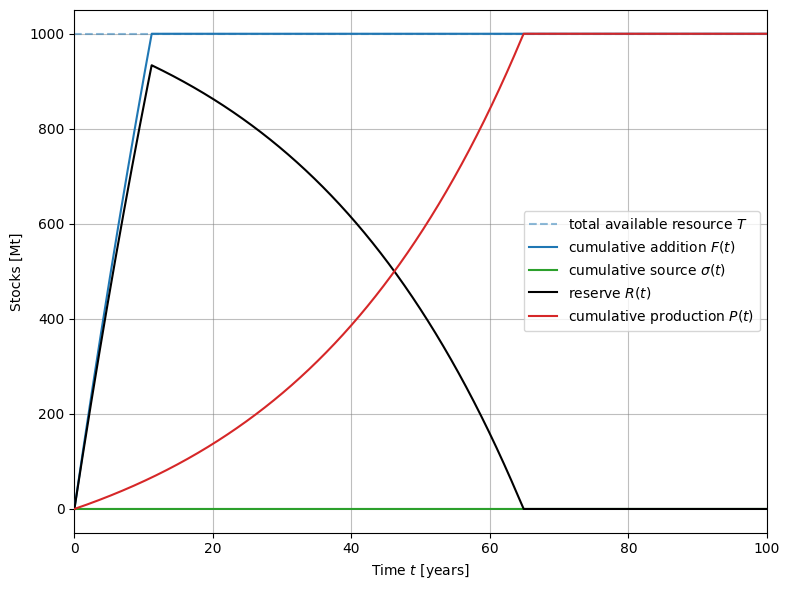

In [3]:
#   2. construct a StocksAndFlows object
stocks_and_flows = sf.StocksAndFlows(
    time_array_years,
    unconstrained_addition_array_Mt_per_year,
    unconstrained_source_array_Mt_per_year,
    unconstrained_production_array_Mt_per_year,
    total_resource_units=total_resource_Mt,
    reserve_initial_units=reserve_initial_Mt,
    maximum_reserve_units=maximum_reserve_Mt,
    units_str="Mt"
)

#   3. run and plot results
stocks_and_flows.run()
stocks_and_flows.plot()

--------

## Final Comments

The usual (i.e., read the docs!). Refer to the documentation that ships with the package.